# DRUG CLASSIFICATION

**IMPORT LIBRARIES**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**LOADING DATASET**

In [134]:
df = pd.read_csv('drug.csv')

**EXPLORATORY DATA ANALYSIS**

In [135]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [136]:
df.shape

(200, 6)

In [137]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [139]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


**SPLITTIG DATA**

In [140]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Sex']= label_encoder.fit_transform(df['Sex'])
df['BP']= label_encoder.fit_transform(df['BP'])
df['Cholesterol']= label_encoder.fit_transform(df['Cholesterol'])

In [141]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state=10)

In [143]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [144]:
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug            object
dtype: object

In [145]:
df['Drug'].value_counts()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [146]:
dTree = DecisionTreeClassifier(criterion='gini',random_state=1)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [147]:
from sklearn import metrics
print(dTree.score(x_test,y_test))

0.9666666666666667


In [148]:
train_char_label = ['drugY','drugX','drugA','drugC','drugB']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree,out_file=Credit_Tree_File,feature_names=list(x_train),class_names = list(train_char_label))
Credit_Tree_File.close()

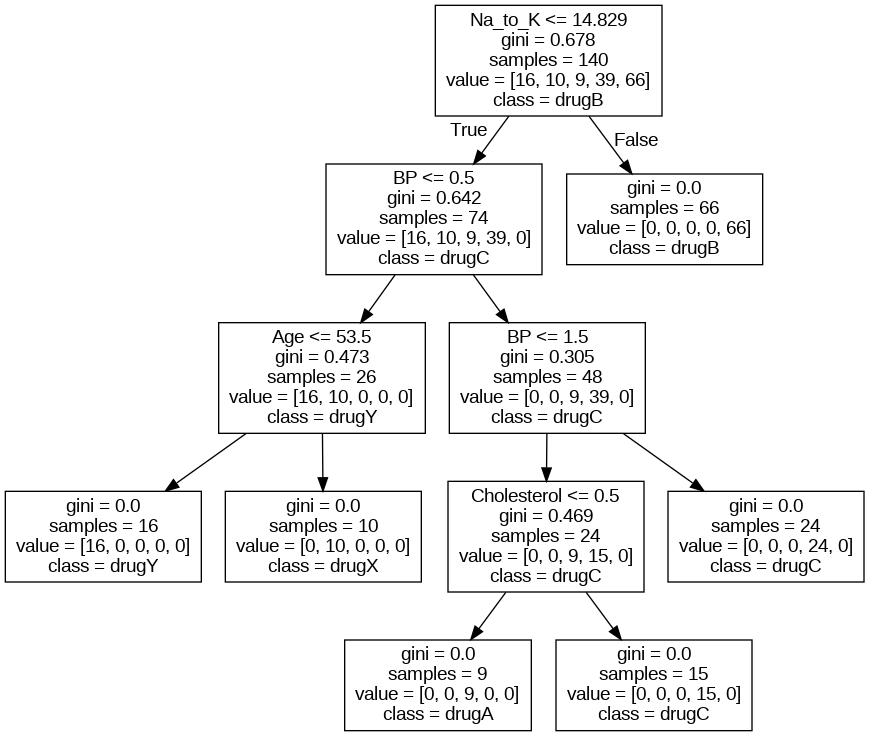

In [149]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error:"+str(retCode))
else:
    display(Image("credit_tree.png"))

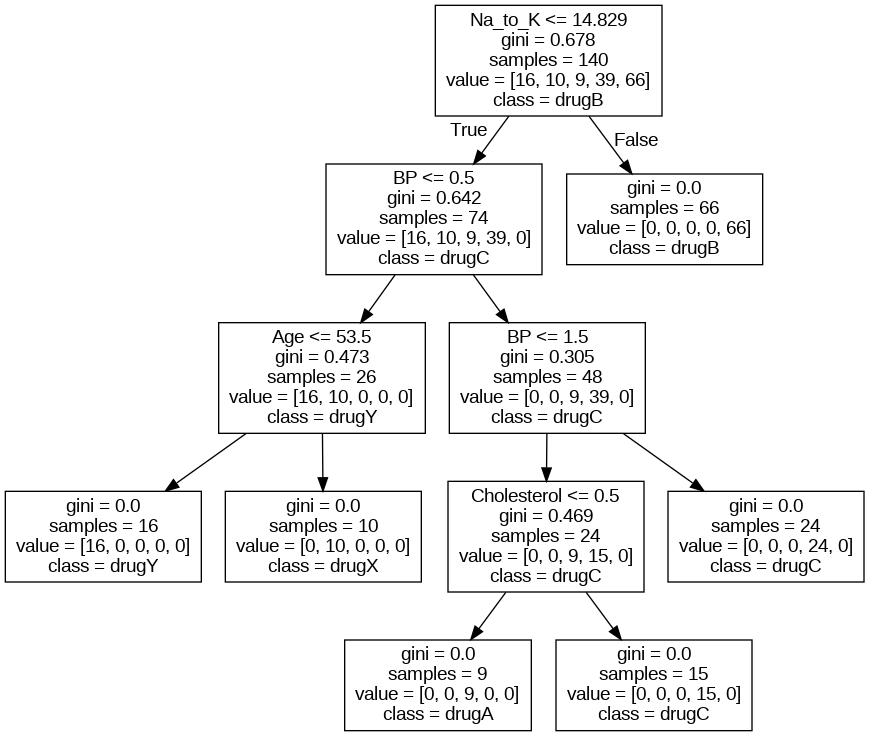

In [150]:
from os import system
from IPython.display import Image
train_char_label = ['drugY','drugX','drugA','drugC','drugB']
Credit_Tree_File = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTree,out_file=Credit_Tree_File,feature_names=list(x_train),class_names = list(train_char_label))
Credit_Tree_File.close()

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error:"+str(retCode))
else:
    display(Image("credit_tree.png"))